In [163]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [164]:
cc = [0] * 182
ws = [0] * 182
r = [0] * 182
a = [0] * 182
a_agg = [list() for x in range(182)]

def running_avg(list1, list2, i):
    return [(x * i + y) / (i + 1) for x,y in zip(list1, list2)]

def agg(l):
    for i in range(len(l)):
        a_agg[i].append(l[i])

In [165]:
# Read in data from files
for i in range(50):
    with open('PPO_Returns/predict_' + str(i) + '.json') as f_in:
        data = json.load(f_in)

        # Aggregate
        obs_cc = data['obs_cc']
        cc = running_avg(cc, obs_cc, i)
        obs_ws = data['obs_ws']
        ws = running_avg(ws, obs_ws, i)
        rewards = data['rewards']
        r = running_avg(r, rewards, i)

        action = data['action']
        a = running_avg(a, action, i)
        agg(action)

a_stddev = [np.std(l) for l in a_agg]

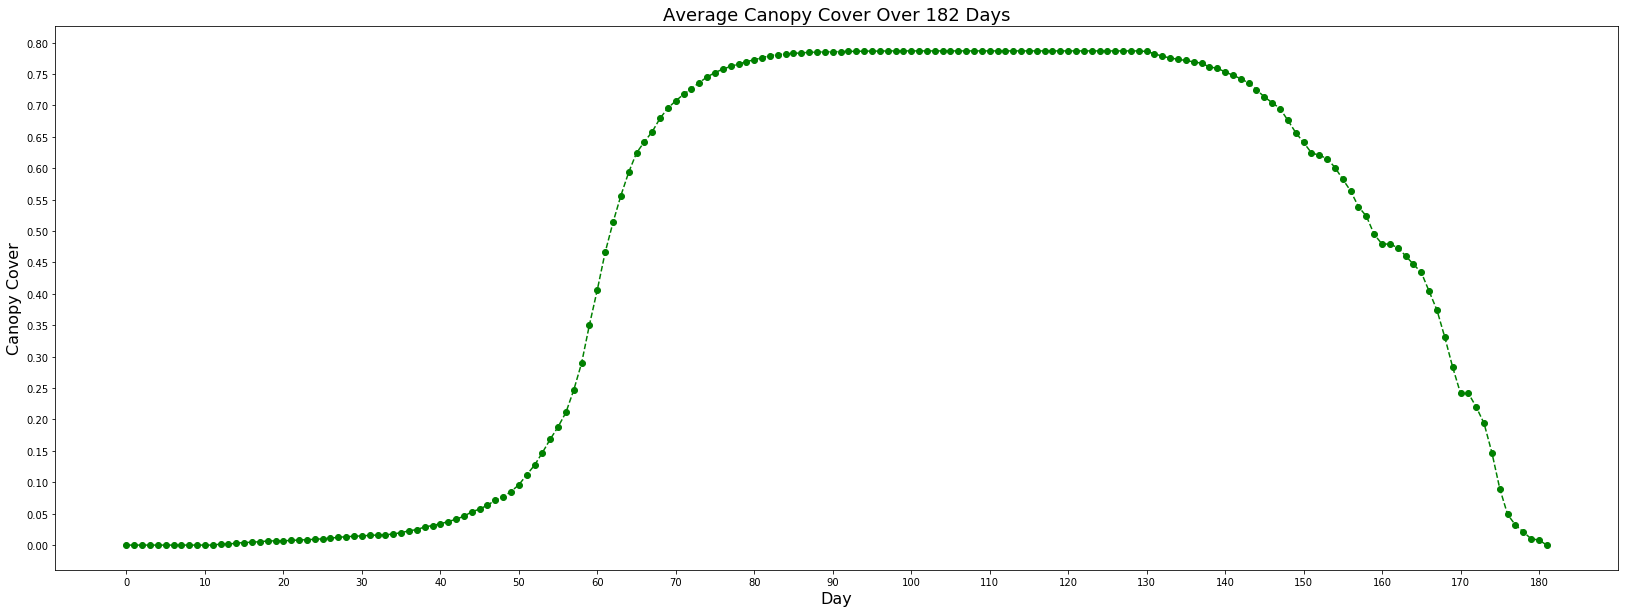

In [178]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.title('Average Canopy Cover Over 182 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Canopy Cover', fontsize=16)

plt.plot([i for i in range(182)], cc, linestyle='--', marker='o', color='g')
plt.savefig('avg_cc.png')
plt.show()

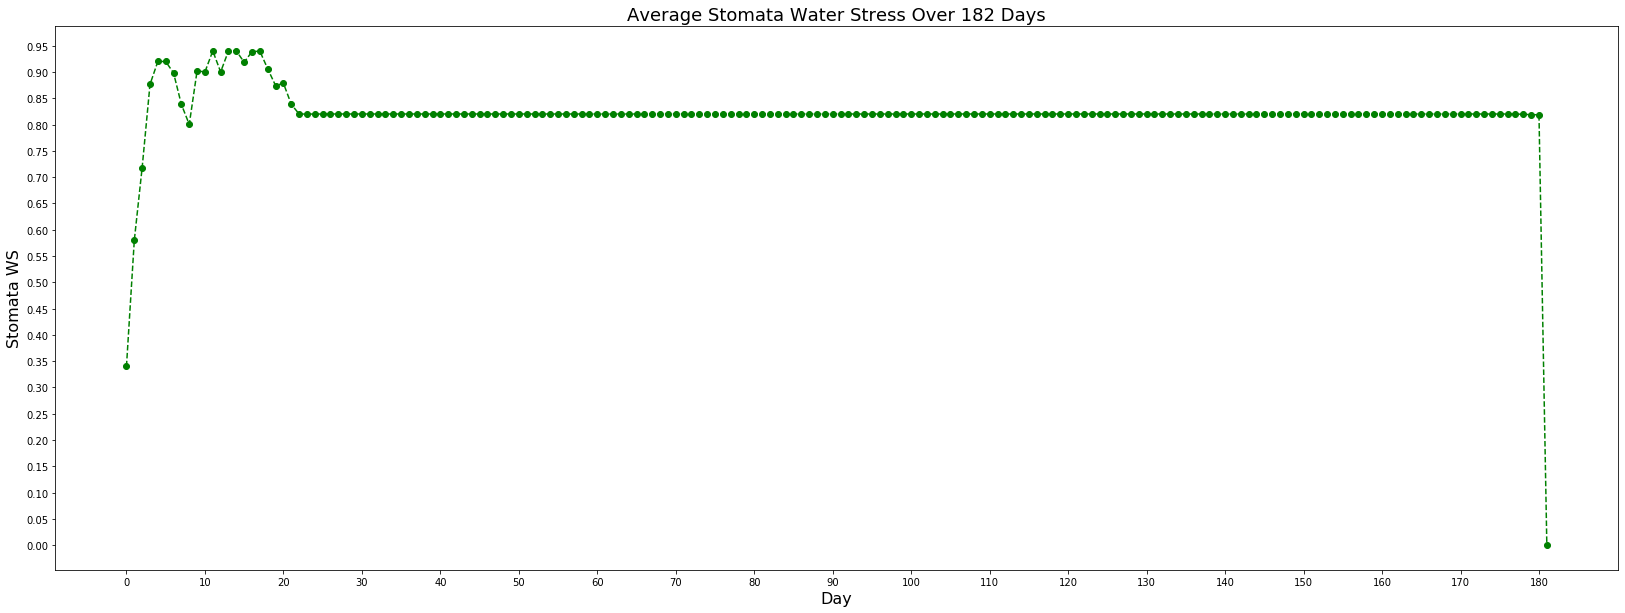

In [179]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.title('Average Stomata Water Stress Over 182 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Stomata WS', fontsize=16)

plt.plot([i for i in range(182)], ws, linestyle='--', marker='o', color='g')
plt.savefig('avg_ws.png')
plt.show()

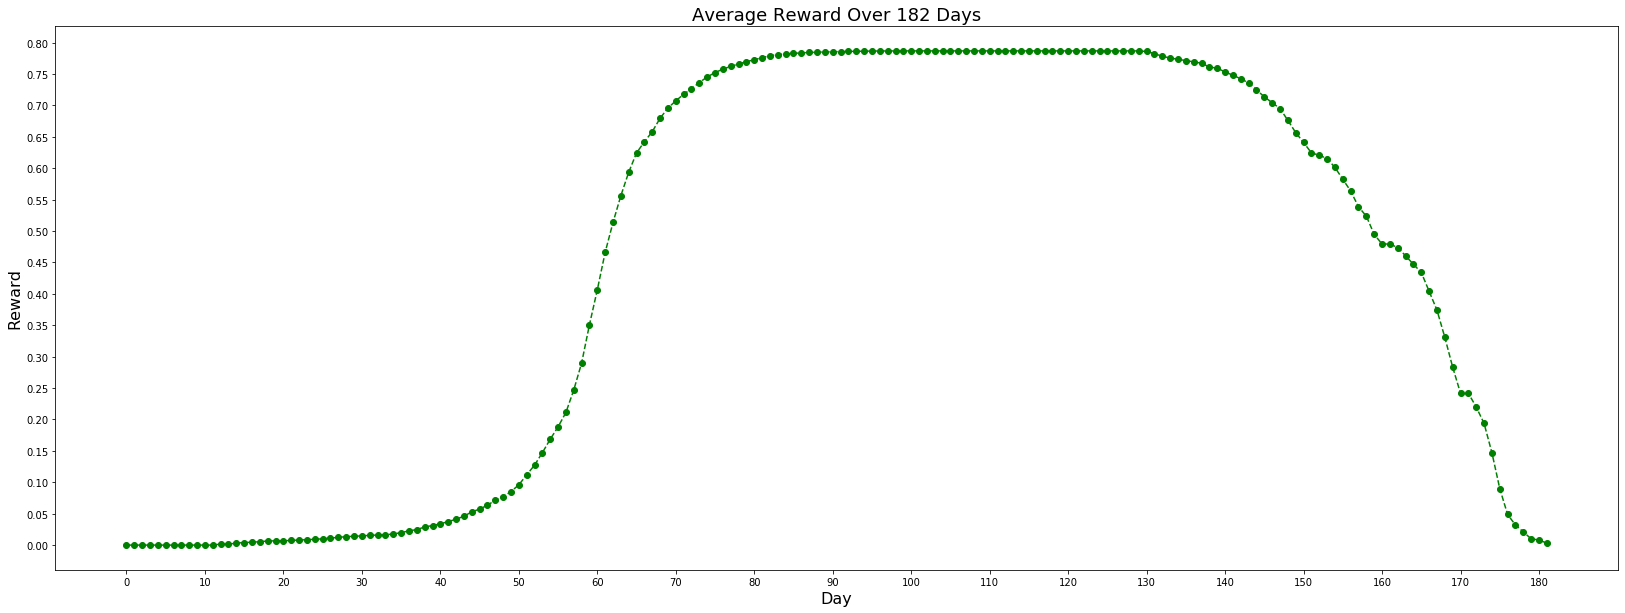

In [182]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0.0, 1.1, 0.05))
plt.title('Average Reward Over 182 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Reward', fontsize=16)

plt.plot([i for i in range(182)], r, linestyle='--', marker='o', color='g')
plt.savefig('avg_r.png')
plt.show()

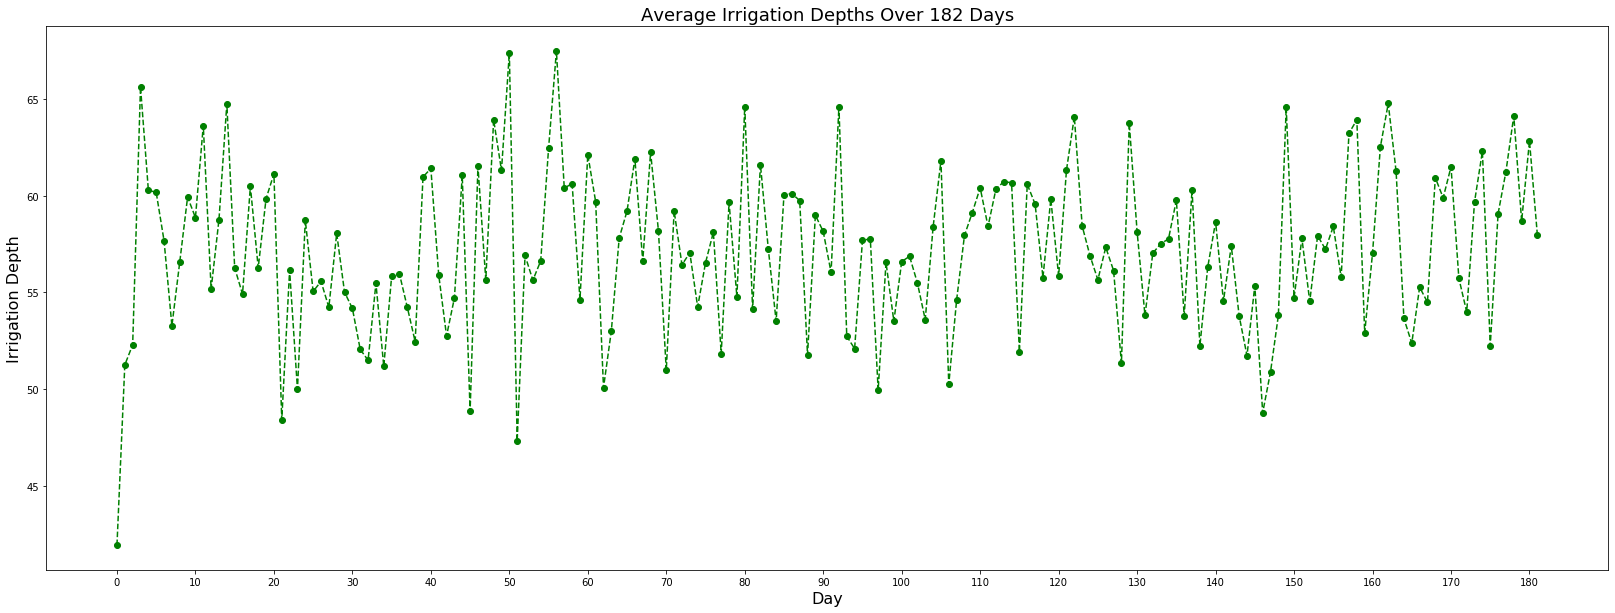

In [180]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0, 101, 5))
plt.title('Average Irrigation Depths Over 182 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Irrigation Depth', fontsize=16)

plt.plot([i for i in range(182)], a, linestyle='--', marker='o', color='g')
plt.savefig('avg_id.png')
plt.show()

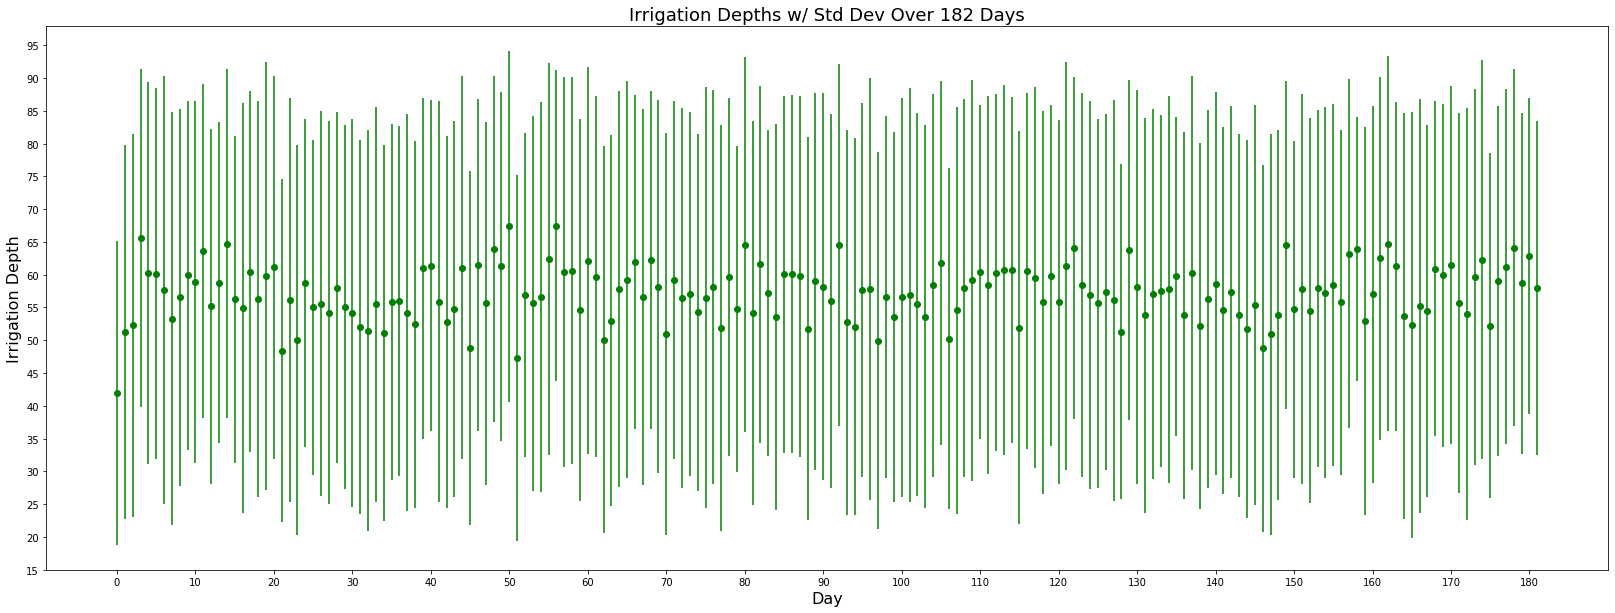

In [181]:
fig = plt.figure(figsize=(28, 10))
plt.xticks(np.arange(0, 182, 10))
plt.yticks(np.arange(0, 101, 5))
plt.title('Irrigation Depths w/ Std Dev Over 182 Days', fontsize=18)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Irrigation Depth', fontsize=16)

plt.errorbar([i for i in range(182)], a, a_stddev, linestyle='None', marker='o', color='g')
plt.savefig('std_id.png')
plt.show()